# Analiza modela

In [15]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Prvo čitamo tablicu s podacima o rezultatima naših modelima.

In [16]:
df = pd.read_csv('scores2.csv')
df.head()

,train_sample_size,N,n_components,rho,model,R2,MSE
0,5000,500,5,0.01,linreg,0.999996,1.120479
1,5000,500,5,0.01,pcr,0.008567,278123.542607
2,5000,500,5,0.01,pls,0.999916,23.445148
3,5000,500,50,0.01,linreg,0.999996,1.120479
4,5000,500,50,0.01,pcr,0.127465,244769.316087


Potom dodajemo informacije o omjeru dimenzije N naprema veličini training set-a i broju komponenti koje su korištenje u PCR-u i PLS-u u stupce "train_sample_size_N_ratio" i "component_N_ratio" redom.

In [17]:
df['train_sample_size_N_ratio'] = df.apply(lambda x: x.train_sample_size / x.N, axis=1)
df['component_N_ratio'] = df.apply(lambda x: x.n_components / x.N, axis=1)
df.head()

,train_sample_size,N,n_components,rho,model,R2,MSE,train_sample_size_N_ratio,component_N_ratio
0,5000,500,5,0.01,linreg,0.999996,1.120479,10.0,0.01
1,5000,500,5,0.01,pcr,0.008567,278123.542607,10.0,0.01
2,5000,500,5,0.01,pls,0.999916,23.445148,10.0,0.01
3,5000,500,50,0.01,linreg,0.999996,1.120479,10.0,0.10
4,5000,500,50,0.01,pcr,0.127465,244769.316087,10.0,0.10


Sad cemo grafički prikazati kako R2 ovisi o gore uvedenim omjerima. Nacrtat cemo po jedan graf za svaku vrijednost kovarijance $\rho$ među kovarijatama.

In [18]:
df.rho.unique()

array([0.01, 0.1 , 0.2 , 0.5 , 0.9 , 0.99])

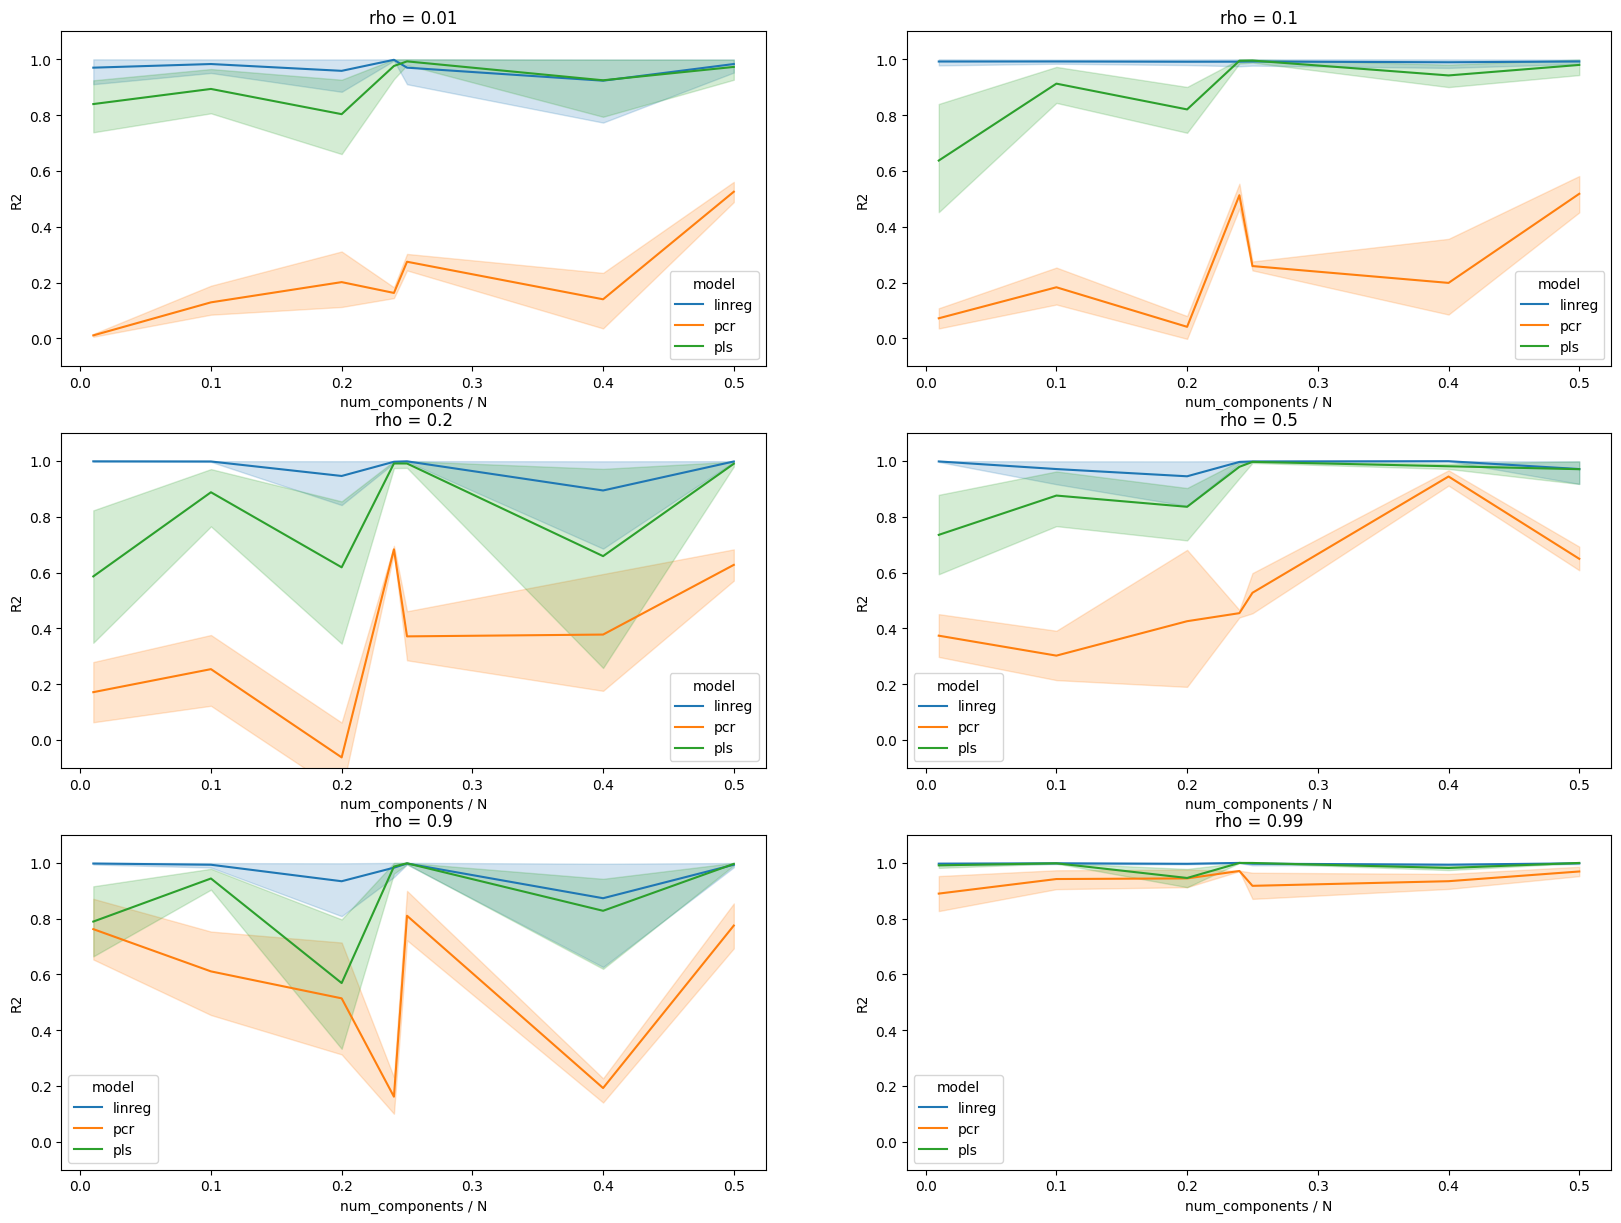

In [19]:
plt.figure(figsize=(20, 20))

plt_y = 2
plt_x = df.rho.nunique() // plt_y + 1

for idx, rho in enumerate(df.rho.unique()):
    df_rho = df[df.rho == rho]
    plt.subplot(plt_x, plt_y, idx+1)
    sns.lineplot(x='component_N_ratio', y='R2', hue='model', data=df_rho)
    plt.title(f"rho = {rho}")
    plt.ylim(-0.1, 1.1)
    plt.xlabel('num_components / N')

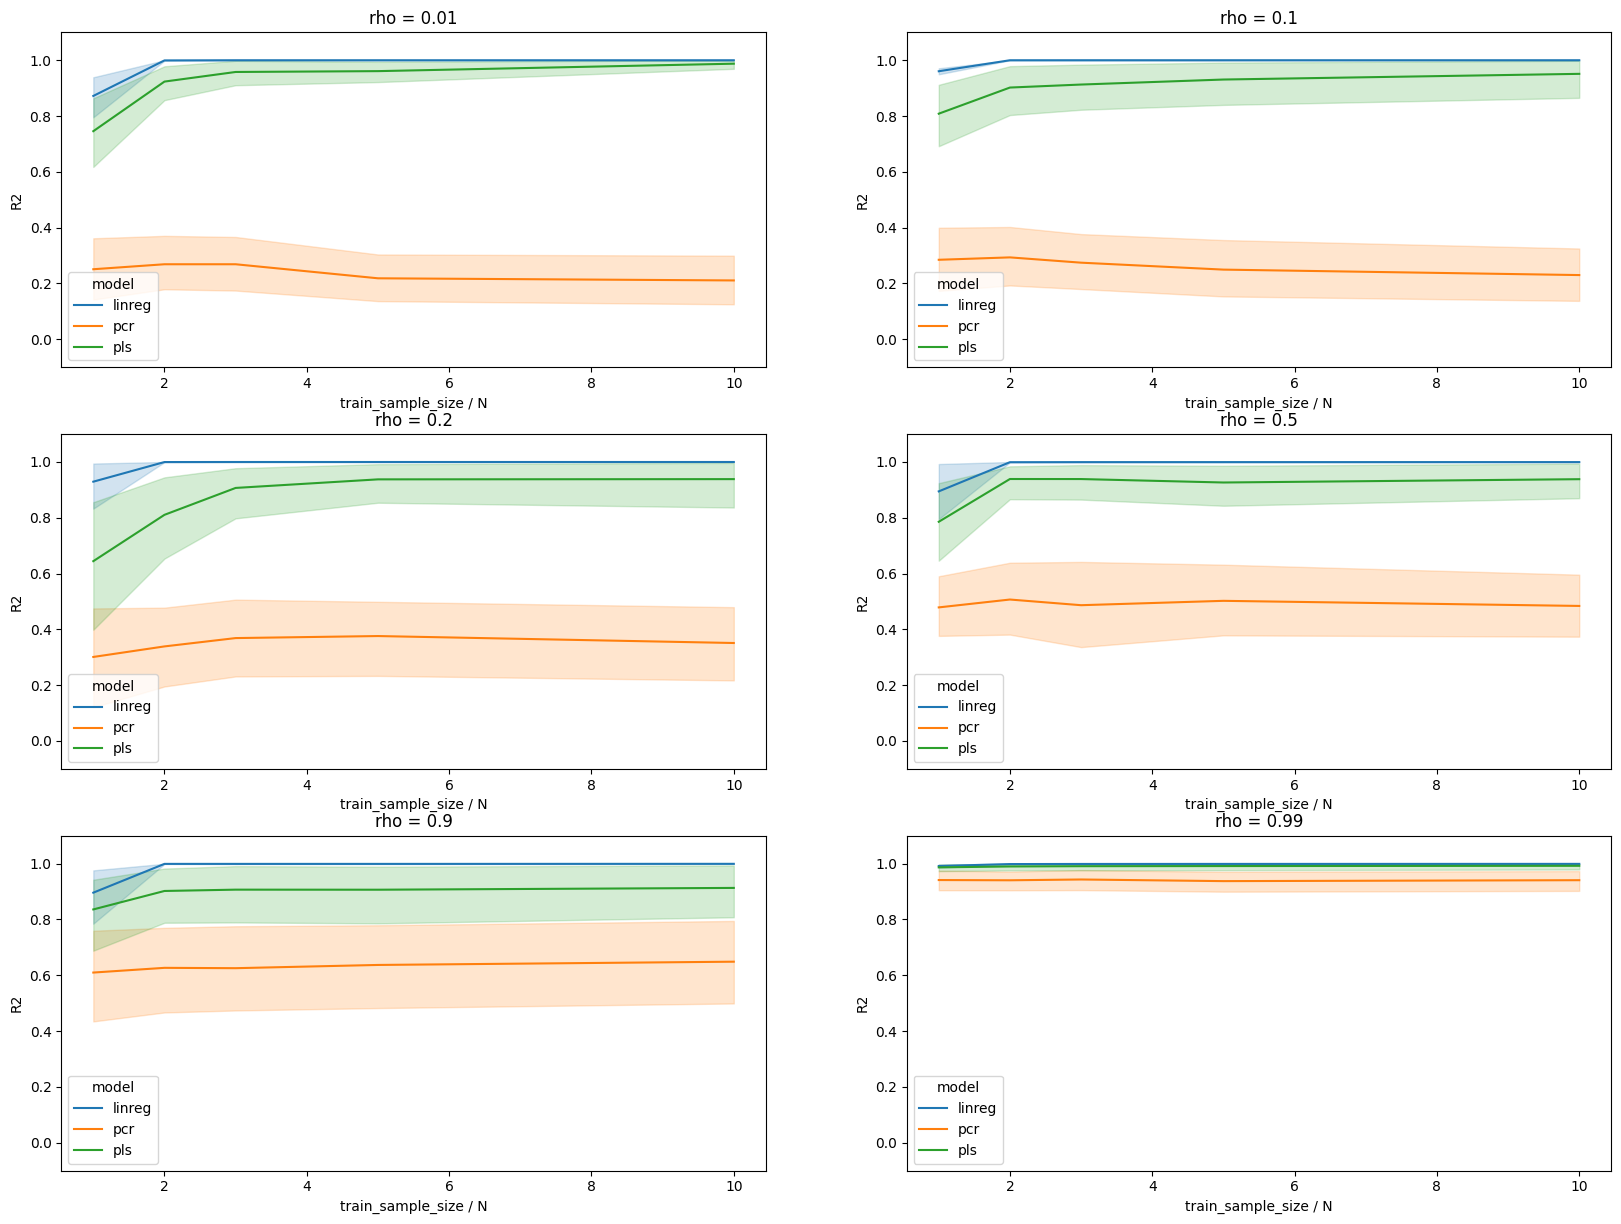

In [20]:
plt.figure(figsize=(20, 20))

plt_y = 2
plt_x = df.rho.nunique() // plt_y + 1

for idx, rho in enumerate(df.rho.unique()):
    df_rho = df[df.rho == rho]
    plt.subplot(plt_x, plt_y, idx+1)
    sns.lineplot(x='train_sample_size_N_ratio', y='R2', hue='model', data=df_rho)
    plt.title(f"rho = {rho}")
    plt.ylim(-0.1, 1.1)
    plt.xlabel('train_sample_size / N')

Među gornjim grafovima je zanimljivo uočiti kako je u slučaju najviše korelacije $\rho = 0.99$ linearna regresija najlošija među metodama ukoliko imamo malen uzorak.

Sljedeći graf prikazuje koliko metode u prosjeku ovise o koeficijentu korelacije $\rho$. Ovdje se jasno vidi da PCR više ovisi o veličini korelacije nego PLS. Također je zanimljivo da kod najveće razine korelacije $\rho = 0.99$ PLS u prosjeku čak mrvu bolje predviđa od linearne regresije.

<AxesSubplot: xlabel='rho', ylabel='MSE'>

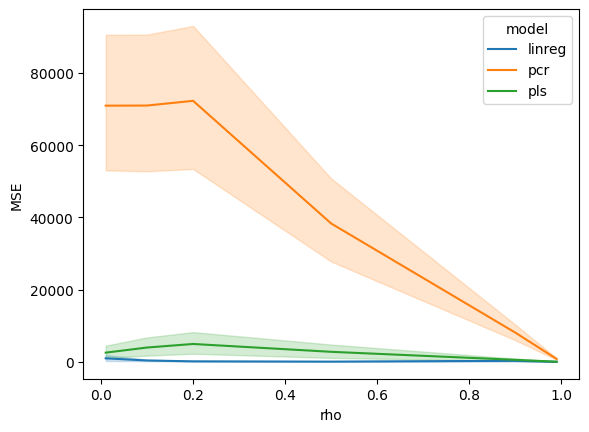

In [22]:
sns.lineplot(x='rho', y='MSE', data = df, hue='model')